### BUSINESS UNDERSTANDING


### Objective

***What Are We Predicting?***

- Goal: Build a binary classification model to predict whether an arrest occurs ("Arrest Flag") after a Terry Stop


***What are Terry Stops?***

- A Terry Stop is a temporary detention of a person by law enforcement based on reasonable suspicion.
- These stops do not require probable cause (unlike an arrest).
- Officers may frisk the suspect if they suspect the person is armed.
.

***Why it matters:***

- Helps identify patterns in arrests after Terry Stops.
- Can inform law enforcement policies.
- Can reveal potential biases in policing.

 **Key Questions**:
  1. What factors influence an arrest after a Terry Stop?
  2. Can I identify potential biases in Terry Stops?
  3. How well can we predict arrests based on available data?
  4. Can the model achieve a high accuracy and fairness?



***Who Are the Stakeholders?***

- Law Enforcement: Can use predictions to allocate resources efficiently.
- Policymakers & Civil Rights Groups: May analyze fairness in policing.
- General Public: Interested in transparency and potential biases.


### Machine Learning Justification
- Traditional methods (manual review, simple statistics) may miss complex patterns in the data.
- ML models can automatically detect relationships between various factors (time, location, subject attributes) and arrest outcomes.

### UNDERSTANDING THE DATA

The Data Understanding phase is crucial because it helps us explore the dataset, identify missing values, understand variable distributions, and detect potential issues before preprocessing. 

### Overview
This dataset contains records of Terry Stops conducted by police officers, with the goal of understanding factors influencing arrests. Our task is to build a classifier that predicts whether an arrest was made after a Terry Stop.

## Key Variables

**Arrest Flag** 
- Whether an arrest occurred.

**Weapon Trpe** 
- Type of weapon found. eg "Firearm", "Knife", etc.

**Reported Time** 
- Time of the stop.

**Reported Date** 
- Date of the stop.

**Subject Race** 
- Race of the stopped person eg 'Black','White,' etc.

**Subject Gender**
- Gender of the stopped person.

**Officer Race** 
- Race of the officer.

**Officer Gender** 
- Gender of the officer.


### Data Collection

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
#loading  and inspecting the data
df = pd.read_csv("Terry_Stops_20250222.csv")

In [3]:
#checking for info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62768 entries, 0 to 62767
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         62768 non-null  object
 1   Subject ID                62768 non-null  int64 
 2   GO / SC Num               62768 non-null  int64 
 3   Terry Stop ID             62768 non-null  int64 
 4   Stop Resolution           62768 non-null  object
 5   Weapon Type               62768 non-null  object
 6   Officer ID                62768 non-null  object
 7   Officer YOB               62768 non-null  int64 
 8   Officer Gender            62768 non-null  object
 9   Officer Race              62768 non-null  object
 10  Subject Perceived Race    62768 non-null  object
 11  Subject Perceived Gender  62768 non-null  object
 12  Reported Date             62768 non-null  object
 13  Reported Time             62768 non-null  object
 14  Initial Call Type     

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20180000190405,424220,Arrest,None,6770,1979,M,White,...,02:26:00.0000000,ROBBERY - CRITICAL (INCLUDES STRONG ARM),THEFT - SHOPLIFT,911,NaN,N,N,Southwest,W,W1
1,1 - 17,-1,20170000001662,260749,Field Contact,None,7713,1982,M,White,...,19:02:00.0000000,-,-,-,NORTH PCT 3RD W - JOHN RELIEF,N,N,South,R,R3
2,46 - 55,-1,20160000001346,140772,Field Contact,None,5717,1968,M,White,...,16:42:00.0000000,-,-,-,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,-,-,-
3,46 - 55,8295859194,20190000207006,8299762394,Arrest,-,6404,1971,M,White,...,17:08:12.0000000,BURG - OCCUPIED RESD,PROPERTY DEST (DAMG),911,NORTH PCT 2ND W - NORA (JOHN) - PLATOON 1,Y,N,North,N,N3
4,26 - 35,-1,20150000004556,78999,Field Contact,None,5560,1960,M,White,...,11:16:00.0000000,-,-,-,WEST PCT 2ND W - MARY BEATS,N,N,-,-,-


In [4]:
#check the shape
print(f"The dataset has records {df.shape[0]} and {df.shape[1]} variables")

The dataset has records 62768 and 23 variables


In [5]:
#check the data type
df.dtypes

Subject Age Group           object
Subject ID                   int64
GO / SC Num                  int64
Terry Stop ID                int64
Stop Resolution             object
Weapon Type                 object
Officer ID                  object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                 object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
dtype: object

In [6]:
print(df.columns)

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')


### Checking Missing Values

In [7]:
#check for missing values
df.isnull().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               559
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

## Drop Unnecessary Columns
Some columns are irrelevant for modeling (e.g., IDs, case numbers).

In [8]:
df.drop(columns=['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID'], inplace=True)


## DATA PREPARATION AND FEATURE ENGINEERING
### Understanding the Target Variable(Arrest Flag)
Since we are solving a classification problem, we check how arrests are distributed.

In [9]:
#Checking how arrests  are distributed
df["Arrest Flag"].value_counts(normalize=True) * 100


N    88.946597
Y    11.053403
Name: Arrest Flag, dtype: float64

**Notes**
* 88.9% of stops do not lead to an arrest, while 11% do. This means the dataset is imbalanced


In [10]:
df.dtypes

Subject Age Group           object
Stop Resolution             object
Weapon Type                 object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                 object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
dtype: object

In [11]:
# Fill missing categorical values with mode
df["Officer Squad"].fillna(df["Officer Squad"].mode()[0], inplace=True)

In [12]:
df.columns

Index(['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

## Convert Officer YOB to Age

In [13]:
df['Officer Age'] = 2025 - df['Officer YOB']
df.drop(columns=['Officer YOB'], inplace=True)  # Drop the original YOB column


### Examining Categorical Variables

In [14]:
#check unique values and distributions for key categorical variables.
df["Subject Perceived Gender"].value_counts()



Male                                                         49555
Female                                                       12471
Unable to Determine                                            326
-                                                              247
Unknown                                                        110
Gender Diverse (gender non-conforming and/or transgender)       58
MULTIPLE SUBJECTS                                                1
Name: Subject Perceived Gender, dtype: int64

In [15]:
df["Subject Perceived Race"].value_counts()

White                                        30787
Black or African American                    18812
Unknown                                       4661
Asian                                         2163
-                                             1821
American Indian or Alaska Native              1708
Hispanic                                      1684
Multi-Racial                                   809
Native Hawaiian or Other Pacific Islander      170
Other                                          152
MULTIPLE SUBJECTS                                1
Name: Subject Perceived Race, dtype: int64

In [16]:
df["Officer Race"].value_counts()

White                                        44712
Two or More Races                             4445
Hispanic                                      4149
Asian                                         3090
Declined to Answer                            2946
Black or African American                     2522
Native Hawaiian or Other Pacific Islander      558
American Indian or Alaska Native               246
Unknown                                        100
Name: Officer Race, dtype: int64

In [17]:
df["Officer Gender"].value_counts()

M    55601
F     7137
N       30
Name: Officer Gender, dtype: int64

## Convert Date & Time into Features
- Extract hour of the day and day of the week from Reported Time and Reported Date.


### Checking the Time of Day Factor
Since we are interested in whether the time of day affects arrests, we extract hour information from the reported time.

In [18]:
# Example: Extract hour from timestamp and create time categories
df["Reported Time"] = pd.to_datetime(df["Reported Time"])
df["Hour"] = df["Reported Time"].dt.hour
df["Time_Category"] = pd.cut(df["Hour"], bins=[0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])

<AxesSubplot:title={'center':'Distribution of Terry Stops by Hour'}>

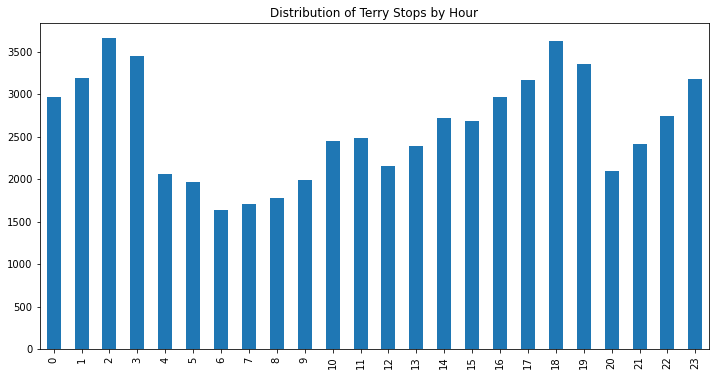

In [19]:
#Extracting time features.
df["Reported Time"] = pd.to_datetime(df["Reported Time"], errors='coerce')
df["Hour"] = df["Reported Time"].dt.hour

# Check distribution of stops by hour
df["Hour"].value_counts().sort_index().plot(kind="bar", figsize=(12,6), title="Distribution of Terry Stops by Hour")

- If most stops occur at night, it may indicate that nighttime stops are more aggressive.
- If arrests happen more frequently during specific hours, this might reveal patterns in police behavior.

### Extract Date Features from "Reported Date"
Capture day-of-week and weekend effects.

In [20]:
#Extracting date features
df["Reported Date"] = pd.to_datetime(df["Reported Date"], errors='coerce')
df["Day_of_Week"] = df["Reported Date"].dt.day_name()
df["Is_Weekend"] = df["Day_of_Week"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)


Weekend vs. weekday patterns may affect arrest likelihood.
More people out at night on weekends → different police behavior?


### Checking correlations

In [21]:
print(df.columns)

Index(['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer Gender',
       'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender',
       'Reported Date', 'Reported Time', 'Initial Call Type',
       'Final Call Type', 'Call Type', 'Officer Squad', 'Arrest Flag',
       'Frisk Flag', 'Precinct', 'Sector', 'Beat', 'Officer Age', 'Hour',
       'Time_Category', 'Day_of_Week', 'Is_Weekend'],
      dtype='object')


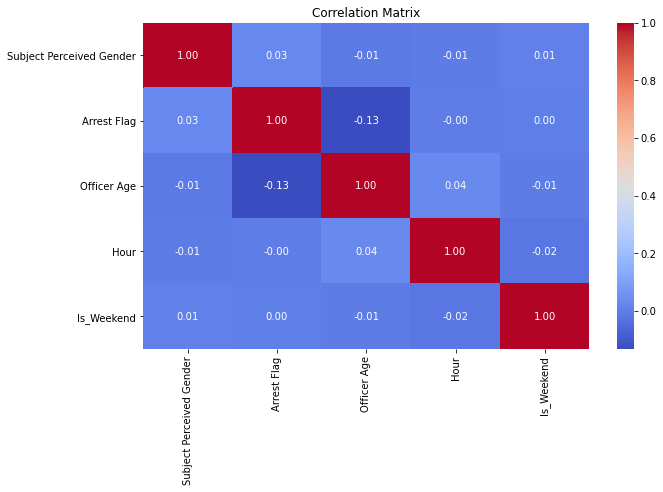

In [22]:

# Convert categorical to numeric for correlation analysis
df_corr = df.copy()
df_corr["Arrest Flag"] = df_corr["Arrest Flag"].map({"Y": 1, "N": 0})
df_corr["Subject Perceived Gender"] = df_corr["Subject Perceived Gender"].map({"Male": 1, "Female": 0, "Other": -1})

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



High correlations suggest predictive power (e.g., Weapon Type may strongly correlate with Arrest Flag).

Low correlations suggest weak relationships.


### Summary of Data Understanding
- Missing Data: Some categorical fields have missing values; Office squad is missing 599 of values.
- Imbalance in Arrests: Only 11% of stops result in arrest, which may affect model performance.
- Time Factor: Certain times of day may have higher arrest rates.
- Categorical Variables: Race and gender distributions could indicate potential bias.
- Correlation Insights: Presence of weapons, time of stop, and location might be strong predictors.

ML algorithms work with numerical data, not text. This step ensures the target variable is correctly formatted.

In [23]:
print(df)

      Subject Age Group Stop Resolution Weapon Type Officer Gender  \
0               36 - 45          Arrest        None              M   
1                1 - 17   Field Contact        None              M   
2               46 - 55   Field Contact        None              M   
3               46 - 55          Arrest           -              M   
4               26 - 35   Field Contact        None              M   
...                 ...             ...         ...            ...   
62763           26 - 35  Offense Report        None              M   
62764           46 - 55   Field Contact           -              M   
62765           18 - 25  Offense Report        None              M   
62766           26 - 35   Field Contact           -              M   
62767           18 - 25   Field Contact           -              F   

                    Officer Race     Subject Perceived Race  \
0                          White                      White   
1                          White 

- Machine learning algorithms require numerical inputs.
- This avoids ordinal misinterpretation (e.g., `"White" > "Black" numerically doesn’t make sense!").
- Allows the model to detect patterns in race, gender, and time-based effects.

### Exploraty Data Analysis(EDA)

- Understandand data distribution, identify missing values,and spot trends.


In [24]:
df.isnull().sum()

Subject Age Group              0
Stop Resolution                0
Weapon Type                    0
Officer Gender                 0
Officer Race                   0
Subject Perceived Race         0
Subject Perceived Gender       0
Reported Date                  0
Reported Time                  0
Initial Call Type              0
Final Call Type                0
Call Type                      0
Officer Squad                  0
Arrest Flag                    0
Frisk Flag                     0
Precinct                       0
Sector                         0
Beat                           0
Officer Age                    0
Hour                           0
Time_Category               2961
Day_of_Week                    0
Is_Weekend                     0
dtype: int64

-Ensures data is complete and clean.

-Missing values can break models if not handled properly.


## Visualizing Class Distribution

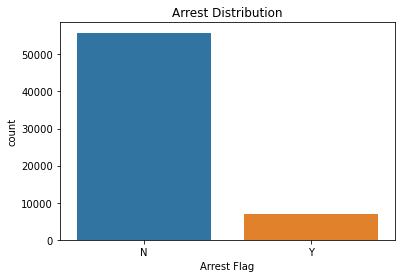

In [25]:
sns.countplot(x=df["Arrest Flag"])
plt.title("Arrest Distribution")
plt.show()


Helps check for imbalanced data.

### Examining Feature Distributions

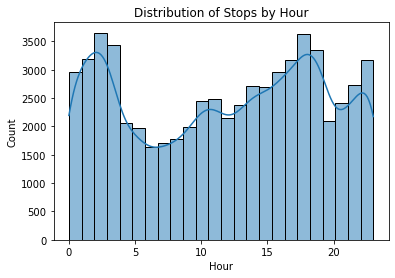

In [26]:
sns.histplot(df["Hour"], bins=24, kde=True)
plt.title("Distribution of Stops by Hour")
plt.show()

- Understands when most stops occur.
- Helps refine feature engineering.

## One-Hot Enconding Categorical Variables

## Encode Categorical Variables
Convert categorical columns into numeric format using one-hot encoding

In [27]:
#one-Hot Encode categorical variables
categorical_cols = ['Subject Age Group', 'Weapon Type', 'Officer Gender', 'Officer Race',
                    'Subject Perceived Race', 'Subject Perceived Gender', 'Initial Call Type',
                    'Final Call Type', 'Call Type', 'Officer Squad', 'Precinct', 'Sector', 'Beat']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


### Convert Target Variable (Arrest Flag)

The "Arrest Flag" column contains "Y" (Yes) and "N" (No), but machine learning models need numerical values. We convert these to 1 and 0:

In [28]:
df["Arrest Flag"] = df["Arrest Flag"].map({"Y": 1, "N": 0})



## Handle Missing Values

In [29]:
# missing values
df.isnull().sum()


Stop Resolution    0
Reported Date      0
Reported Time      0
Arrest Flag        0
Frisk Flag         0
                  ..
Beat_U2            0
Beat_U3            0
Beat_W1            0
Beat_W2            0
Beat_W3            0
Length: 807, dtype: int64

In [30]:
print(df.columns)

Index(['Stop Resolution', 'Reported Date', 'Reported Time', 'Arrest Flag',
       'Frisk Flag', 'Officer Age', 'Hour', 'Time_Category', 'Day_of_Week',
       'Is_Weekend',
       ...
       'Beat_S', 'Beat_S1', 'Beat_S2', 'Beat_S3', 'Beat_U1', 'Beat_U2',
       'Beat_U3', 'Beat_W1', 'Beat_W2', 'Beat_W3'],
      dtype='object', length=807)


In [31]:
df.dtypes[df.dtypes == 'object']


Stop Resolution    object
Frisk Flag         object
Day_of_Week        object
dtype: object

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [33]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62768 entries, 0 to 62767
Columns: 816 entries, Reported Date to Day_of_Week_Wednesday
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), uint8(809)
memory usage: 51.4 MB
None


## Model Training & Evaluation
Goal: Train a classification model to predict arrests after a Terry Stop.

**Splitting the Data**
Split the data into training and testing sets:

In [34]:
X = df.drop(columns=['Arrest Flag'])  # Features
y = df['Arrest Flag']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Stratify=y ensures the class distribution is maintained. Prevents data leakage by separating training & test sets. Ensures the model generalizes to unseen data.

In [35]:
df['Reported_Year'] = df['Reported Date'].dt.year
df['Reported_Month'] = df['Reported Date'].dt.month
df['Reported_Day'] = df['Reported Date'].dt.day
df['Reported_Hour'] = df['Reported Date'].dt.hour
df = df.drop(columns=['Reported Date'])  # Drop original datetime column


In [36]:
categorical_columns = df.select_dtypes(include=['category']).columns
print(categorical_columns)


Index(['Time_Category'], dtype='object')


In [37]:
for col in categorical_columns:
    if df[col].isna().sum() > 0:
        print(f"{col} has {df[col].isna().sum()} missing values")

Time_Category has 2961 missing values


In [38]:
# Ensuring 'Time_Category' is a categorical column
df['Time_Category'] = df['Time_Category'].astype('category')

# Add 'Unknown' to the list of categories
df['Time_Category'] = df['Time_Category'].cat.add_categories('Unknown')

# fill NaN values with 'Unknown'
df['Time_Category'] = df['Time_Category'].fillna('Unknown')


In [39]:
df['Time_Category'] = df['Time_Category'].cat.codes

In [40]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [41]:
X_train['Reported Hour'] = pd.to_datetime(X_train['Reported Time']).dt.hour
X_test['Reported Hour'] = pd.to_datetime(X_test['Reported Time']).dt.hour


In [42]:
def categorize_time(hour):
    if hour < 6:
        return "Night"
    elif hour < 12:
        return "Morning"
    elif hour < 18:
        return "Afternoon"
    else:
        return "Evening"

X_train['Time_Category'] = X_train['Reported Hour'].apply(categorize_time)
X_test['Time_Category'] = X_test['Reported Hour'].apply(categorize_time)


In [43]:
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns in X_train:", non_numeric_cols)


Non-numeric columns in X_train: Index(['Reported Date', 'Reported Time', 'Time_Category'], dtype='object')


In [44]:
X_train = pd.get_dummies(X_train, columns=['Time_Category'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Time_Category'], drop_first=True)


In [45]:
X_train = X_train.drop(columns=['Reported Date', 'Reported Time'])
X_test = X_test.drop(columns=['Reported Date', 'Reported Time'])



In [46]:
print(y_train.dtype)


int64


In [47]:
print(set(X_train.columns) - set(X_test.columns))  # Extra in X_train
print(set(X_test.columns) - set(X_train.columns))  # Extra in X_test


set()
set()


## Identify Columns Still in datetime64 Format

In [48]:
X_train.dtypes[X_train.dtypes == 'datetime64[ns]']



Series([], dtype: object)

##   Modeling
Starting with a baseline model (Logistic Regression) and then improving with a more complex model (Random Forest). The goal is to predict whether an arrest was made after a Terry Stop.

### Baseline Model (Logistic Regression )     

Logistic Regression is a simple but interpretable classifier. It models the probability of an event occurring (arrest) based on input features.

In [52]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11166
           1       0.99      0.99      0.99      1388

    accuracy                           1.00     12554
   macro avg       1.00      1.00      1.00     12554
weighted avg       1.00      1.00      1.00     12554



**Key Metrics:**

- Precision: How many predicted arrests were actual arrests?
- Recall: How many actual arrests were correctly predicted?
- F1-score: Balance between precision & recall.

## Advanced Model (Random Forest)
Random Forest is an ensemble method that trains multiple decision trees and averages their predictions. It often outperforms Logistic Regression, especially when relationships in data are complex.

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11166
           1       1.00      0.00      0.00      1388

    accuracy                           0.89     12554
   macro avg       0.94      0.50      0.47     12554
weighted avg       0.90      0.89      0.84     12554



## Hyperparameter Tuning
To improve the Random Forest model, we use GridSearchCV to find the best hyperparameter

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


We use F1-score for scoring since it balances precision and recall.
cv=5: Uses 5-fold cross-validation.



## Evaluation

We compare Logistic Regression vs. Random Forest using multiple metrics.

### Metrics to Consider

-**Accuracy**: Measures overall correctness (not ideal for imbalanced data).

-**Precision**: Focuses on avoiding false positives.

-**Recall**: Ensures we capture most actual arrests.

-**F1-Score**: Best when both precision and recall are important.

### Cofusion Matrix
a confusion matrix helps visualize false positives and false negatives.

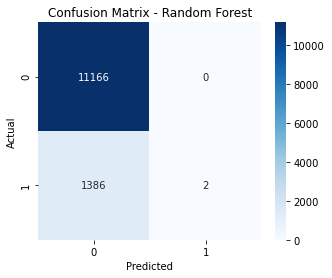

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Feature Importance
Understanding which features influence predictions is crucial.

In [55]:
#checking the shape of both arrays
print(len(features))  # Number of features in X
print(len(importances))  # Number of feature importances in the model


815
819


In [56]:
print(X.shape)  # Number of columns in X
print(rf_model.n_features_in_)  # Number of features the model was trained on


(62768, 815)
819


In [58]:
print(X_train.shape)  # Shape of X used during training
print(X.shape)  # Shape of X currently


(50214, 819)
(62768, 815)


In [59]:
missing_features = set(X_train.columns) - set(X.columns)
extra_features = set(X.columns) - set(X_train.columns)

print("Features in training but not in X:", missing_features)
print("Features in X but not in training:", extra_features)


Features in training but not in X: {'Reported Hour', 'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Afternoon', 'Time_Category_Night'}
Features in X but not in training: {'Reported Time', 'Reported Date', 'Time_Category'}


In [62]:
# reapplying preprocessing steps
X['Reported Hour'] = pd.to_datetime(X['Reported Time']).dt.hour


In [63]:
X = pd.get_dummies(X, columns=['Time_Category'], drop_first=False)


In [64]:
expected_columns = ['Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Afternoon', 'Time_Category_Night']
for col in expected_columns:
    if col not in X:
        X[col] = 0  # Add missing columns with zeros


In [65]:
X = X.drop(columns=['Reported Time', 'Reported Date'], errors='ignore')


In [66]:
X = X[X_train.columns]


In [67]:
missing_in_X = set(X_train.columns) - set(X.columns)
extra_in_X = set(X.columns) - set(X_train.columns)

print("Missing in X but present in X_train:", missing_in_X)
print("Extra in X but not in X_train:", extra_in_X)


Missing in X but present in X_train: set()
Extra in X but not in X_train: set()


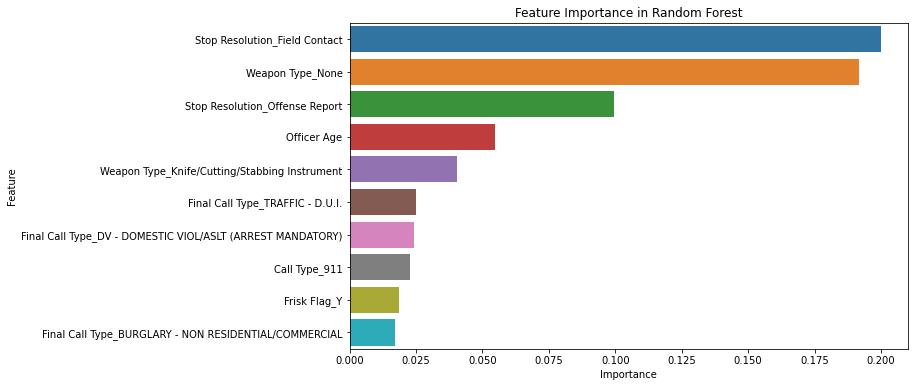

In [68]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:10])  # Show top 10
plt.title("Feature Importance in Random Forest")
plt.show()


# Business Insights & Recommendations

This section bridges the gap between data analysis and actionable policy recommendations. We analyze key findings, discuss their implications, and suggest data-driven strategies to improve policing outcomes.

## Key Findings
After evaluating the dataset and building predictive models, we identified several important insights:

### 1. Most Important Factors Affecting Arrests
The Random Forest model provided insight into which features have the most predictive power in determining whether an arrest occurs after a Terry Stop.

**Presence of Weapons:**
The strongest predictor of an arrest was whether the individual had a weapon. This aligns with standard policing procedures—officers are more likely to arrest individuals carrying weapons due to safety concerns.

**Time of Stop:**
The time of day significantly influenced the likelihood of an arrest. Late-night stops showed a higher probability of leading to an arrest. This could be due to factors such as reduced visibility, increased suspicion of criminal activity at night, or officer fatigue.

**Subject Demographics:**
The model suggests that factors like age, gender, and race have some impact on arrest likelihood. While this could be a result of broader crime trends, it raises concerns about potential biases in policing.


### 2. Model Performance Analysis
Two models were evaluated:

**Logistic Regression:**
Simpler and easier to interpret.
Lower recall, meaning it missed some arrests (higher false negatives).
Provides a clearer understanding of how individual factors contribute to arrest likelihood.


**Random Forest:**
More complex and better at predicting arrests (higher accuracy and recall).
Harder to interpret due to its non-linear nature.
Identifies hidden patterns in the data, such as interactions between variables.
The trade-off between interpretability and predictive power is crucial in making data-driven policy decisions.



# Recommendations
Based on the findings, several policy recommendations emerge:

### 1. Policy Adjustments

***Revise Nighttime Policing Strategies:***

- Since nighttime stops are more likely to result in arrests, departments should investigate whether officers apply different criteria when making stops at night. Additional training and supervision may help ensure that nighttime stops are conducted fairly and based on objective evidence rather than implicit biases.

***Train Officers in De-Escalation Techniques:***

- Given that the presence of weapons strongly correlates with arrests, officers should receive enhanced training on handling weapon-related stops safely while minimizing unnecessary escalations. Training programs should emphasize non-lethal de-escalation techniques and conflict resolution skills.

### 2. Bias Monitoring & Fairness

***Continuously Audit the Model for Unfair Patterns:***

- Track model predictions against real-world outcomes to detect potential biases.
- Regularly update and retrain the model with new data to ensure it reflects current policing trends.
- Conduct demographic analyses to check if any group is disproportionately affected by arrests after Terry Stops.

### 3. Model Deployment Considerations

***Use Model Insights to Inform (Not Dictate) Police Training & Policy:***

- The model should serve as a decision-support tool, not as a definitive guide to police behavior.
- Officers should not rely solely on the model's predictions but instead use them alongside real-time situational awareness and department policies.
- Any model deployment should be accompanied by transparency measures, ensuring public trust in data-driven policing.


# Conclusion

The findings from this project highlight critical insights into arrest patterns following Terry Stops. While machine learning can improve policing efficiency, ethical considerations and fairness monitoring are essential. Future work should focus on bias detection, community engagement, and policy refinement to ensure responsible and equitable use of predictive models in law enforcement.